In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='facebook/opt-350m'

In [3]:
results = {'acc':[],
           'f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5, 1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.device = model.device
    acc, f1 = trainer.run(lr=lr,
                          wd=0.0,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          accumulation_steps=2,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search facebook/opt-350m, learning rate 1e-05


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/1324 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.0827	Val Loss:	1.5555	Accuracy:	0.4852	F1:	0.3827
2 / 30: Train Loss:	0.7590	Val Loss:	1.4413	Accuracy:	0.4615	F1:	0.3627
3 / 30: Train Loss:	0.7256	Val Loss:	1.6958	Accuracy:	0.4586	F1:	0.3774
4 / 30: Train Loss:	0.9771	Val Loss:	2.0183	Accuracy:	0.1864	F1:	0.0659
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.00      0.00      0.00        67
               anecdote       0.15      0.74      0.25        43
         cherry picking       0.25      0.55      0.34        56
      conspiracy theory       0.00      0.00      0.00        39
           fake experts       0.00      0.00      0.00        12
           false choice       0.00      0.00      0.00        13
      false equivalence       0.00      0.00      0.00        14
impossible expectations       0.00      0.00      0.00        37
           single cause       0.00    

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.9782	Val Loss:	1.3945	Accuracy:	0.5473	F1:	0.4436
2 / 30: Train Loss:	0.5286	Val Loss:	1.5042	Accuracy:	0.5533	F1:	0.5238
3 / 30: Train Loss:	0.9458	Val Loss:	2.0071	Accuracy:	0.3047	F1:	0.2088
4 / 30: Train Loss:	1.0372	Val Loss:	2.0641	Accuracy:	0.1982	F1:	0.0368
5 / 30: Train Loss:	1.0434	Val Loss:	2.0870	Accuracy:	0.1657	F1:	0.0316
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.00      0.00      0.00        67
               anecdote       0.00      0.00      0.00        43
         cherry picking       0.17      1.00      0.28        56
      conspiracy theory       0.00      0.00      0.00        39
           fake experts       0.00      0.00      0.00        12
           false choice       0.00      0.00      0.00        13
      false equivalence       0.00      0.00      0.00        14
impossible expectations       0

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.3607	Val Loss:	1.8951	Accuracy:	0.3284	F1:	0.1780
2 / 30: Train Loss:	1.0205	Val Loss:	2.0592	Accuracy:	0.1982	F1:	0.0368
3 / 30: Train Loss:	1.0483	Val Loss:	2.0538	Accuracy:	0.1982	F1:	0.0368
4 / 30: Train Loss:	1.0447	Val Loss:	2.0754	Accuracy:	0.1657	F1:	0.0316
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.00      0.00      0.00        67
               anecdote       0.00      0.00      0.00        43
         cherry picking       0.17      1.00      0.28        56
      conspiracy theory       0.00      0.00      0.00        39
           fake experts       0.00      0.00      0.00        12
           false choice       0.00      0.00      0.00        13
      false equivalence       0.00      0.00      0.00        14
impossible expectations       0.00      0.00      0.00        37
           single cause       0.00    

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

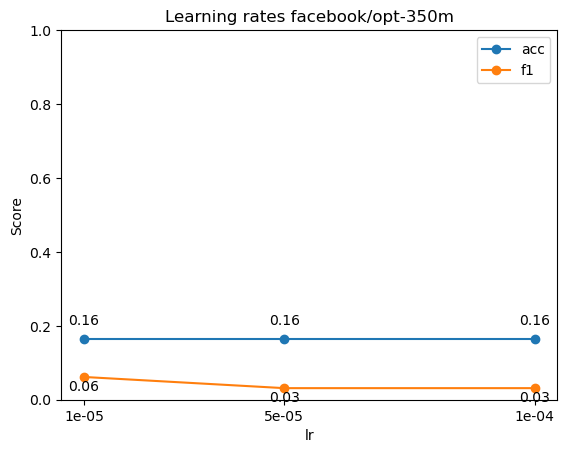

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='lr', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["lr"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["lr"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['lr'], [f'{val:.0e}' for val in df['lr']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('lr')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Learning rates {model_checkpoint}')